In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np
pandas.options.display.max_columns = 4000

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", 'Target']
df = pandas.read_csv(URL, sep=',', na_values=" ?",header=None,names=names)
df=df.drop(labels='fnlwgt',axis=1)
df.head(n=10)


C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)
C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# DATA TRANSFORMATION: Encoding

## OneHotEncoding

In [3]:
# Categorical to numerical using OneHotEncoding for all features
pandas.get_dummies(df).head()

,Age,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Martial Status_ Divorced,Martial Status_ Married-AF-spouse,Martial Status_ Married-civ-spouse,Martial Status_ Married-spouse-absent,Martial Status_ Never-married,Martial Status_ Separated,Martial Status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Country_ Cambodia,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
df.groupby('Workclass').size()


Workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
dtype: int64

In [5]:
#Categorical to numerical using OneHotEncoding for some features (Workclass) and removing one value
pandas.get_dummies(df, columns=["Workclass"],drop_first=True).head()

,Age,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


## LabelEncoding

In [6]:
df.groupby('Education').size() / len(df)

Education
 10th            0.028654
 11th            0.036086
 12th            0.013298
 1st-4th         0.005160
 5th-6th         0.010227
 7th-8th         0.019840
 9th             0.015786
 Assoc-acdm      0.032769
 Assoc-voc       0.042443
 Bachelors       0.164461
 Doctorate       0.012684
 HS-grad         0.322502
 Masters         0.052916
 Preschool       0.001566
 Prof-school     0.017690
 Some-college    0.223918
dtype: float64

In [7]:
Education_dict = {' Preschool': 1,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' Some-college': 9,
 ' Prof-school': 10,
 ' Bachelors': 11,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 13,
 ' HS-grad': 14,
 ' Masters': 15,
 ' Doctorate': 16}

df['Education']=df.Education.map(Education_dict)

In [8]:
df.groupby('Education').size()/ len(df)

Education
1     0.001566
2     0.005160
3     0.010227
4     0.019840
5     0.015786
6     0.028654
7     0.036086
8     0.013298
9     0.223918
10    0.017690
11    0.164461
12    0.032769
13    0.042443
14    0.322502
15    0.052916
16    0.012684
dtype: float64

# DATA TRANSFORMATION: Normalization

In [9]:
import pandas as pd

df = pd.io.parsers.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None,
    )
X_wine = df.values[:,1:]
y_wine = df.values[:,0]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb
import numpy as np

cv = StratifiedKFold(n_splits=10, random_state=1) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_wine,y=y_wine, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.6757739938080495

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,20,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X_wine, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 1, 'weights': 'distance'} Accuracy= 0.7471910112359551


In [12]:
# Poor score. What could happen? 
# Remeber that all columns should be in the same range for KNN!!
# Could be that each colum is in a different range?

for i in range(13):
    print('std:',X_wine[:,i].std(),'min',X_wine[:,i].min(),'max',X_wine[:,i].max())

std: 0.8095429145285168 min 11.03 max 14.83
std: 1.1140036269797893 min 0.74 max 5.8
std: 0.27357229442643255 min 1.36 max 3.23
std: 3.3301697576582128 min 10.6 max 30.0
std: 14.242307673359806 min 70.0 max 162.0
std: 0.6240905641965369 min 0.98 max 3.88
std: 0.996048950379233 min 0.34 max 5.08
std: 0.12410325988364795 min 0.13 max 0.66
std: 0.5707488486199379 min 0.41 max 3.58
std: 2.3117646609525573 min 1.28 max 13.0
std: 0.22792860656507252 min 0.48 max 1.71
std: 0.7079932646716005 min 1.27 max 4.0
std: 314.0216568419878 min 278.0 max 1680.0


In [13]:
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X_wine)
X2=scaler.transform(X_wine)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -2.4342353470856977 max 2.2597715200031785
std: 1.0 min -1.4329830495567168 max 3.1091924671589037
std: 1.0 min -3.6791622340370105 max 3.156325269990446
std: 1.0 min -2.6710181364687173 max 3.1545107139410433
std: 1.0 min -2.0882551982316313 max 4.371372139554768
std: 0.9999999999999999 min -2.107246023249296 max 2.539515466781404
std: 1.0 min -1.6959705266274119 max 3.0628317372525964
std: 1.0 min -1.8682340238414565 max 2.4024031898537954
std: 0.9999999999999998 min -2.0690341807257084 max 3.4850725120254245
std: 1.0 min -1.634288275894709 max 3.435431924417896
std: 1.0 min -2.0947324050170844 max 3.3016942153020326
std: 1.0 min -1.8950538941648851 max 1.960914991734472
std: 1.0 min -1.493187645535251 max 2.971472575990396


In [14]:
# Let's repeat the 10-fold Cross-validation with new data X2
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X2, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 9, 'weights': 'uniform'} Accuracy= 0.9719101123595506


# FEATURE SELECTION: Effect of irrelevant columns

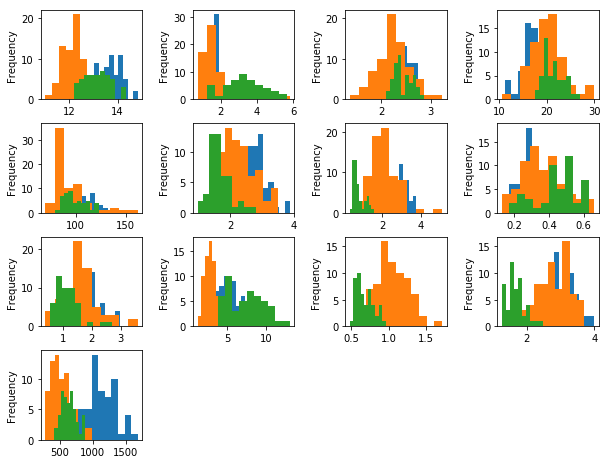

In [15]:
import matplotlib.pyplot as  plt

plt.subplots(figsize=(10, 10))
plt.subplots_adjust(hspace=0.27,wspace=0.5)
for i in range(1,14):
    plt.subplot(5,4,i)
    df[y_wine==1][i].plot.hist(bins=10)
    df[y_wine==2][i].plot.hist(bins=10)
    df[y_wine==3][i].plot.hist(bins=10)
plt.show()


In [16]:
nrcols=20
col = np.random.random(size=(X2.shape[0],nrcols))
scaler = preprocessing.StandardScaler().fit(col)
irelevant=scaler.transform(col)
for i in range(nrcols):
    print('std:',irelevant[:,i].std(),'min',irelevant[:,i].min(),'max',irelevant[:,i].max())

std: 1.0 min -1.7075517257679613 max 1.740035189982741
std: 0.9999999999999998 min -1.7623235796305385 max 1.8347419172018737
std: 1.0 min -1.7459746213474419 max 1.7456290113616821
std: 1.0 min -1.7883319158032471 max 1.5321210940106496
std: 0.9999999999999999 min -1.6718006302942459 max 1.7209952282116991
std: 0.9999999999999998 min -1.8488527195154838 max 1.7458584106631794
std: 1.0 min -1.783003517739367 max 1.5984012909299474
std: 1.0000000000000002 min -1.717003060630668 max 1.922284931091352
std: 1.0 min -1.6085719529310691 max 1.7986455462745052
std: 1.0000000000000002 min -1.798451962098687 max 1.7570182177279918
std: 1.0 min -1.741986737611723 max 1.6819883487406155
std: 1.0 min -1.612546267170763 max 1.6448457773594451
std: 1.0 min -1.7779335376903591 max 1.79933345998248
std: 0.9999999999999998 min -1.601985123931154 max 1.713560230592067
std: 1.0000000000000002 min -1.7399382761917186 max 1.6457475472938943
std: 1.0 min -1.6574212621466706 max 1.6913233991294807
std: 1.0 m

In [17]:
X2_new=np.hstack((X2,irelevant))

from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv = StratifiedKFold(n_splits=10, random_state=1) 
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X2_new, y=y_wine,cv=cv, scoring='accuracy')  
print(np.mean(cv_scores))

0.9331892844857241


In [18]:
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X2_new, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 15, 'weights': 'distance'} Accuracy= 0.9382022471910112


# Feature Selection: Ranking

In [19]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_reduced = SelectKBest(mutual_info_classif, k=2).fit_transform(X2_new, y_wine)

# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X_reduced, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 7, 'weights': 'uniform'} Accuracy= 0.898876404494382


In [20]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_reduced = SelectKBest(mutual_info_classif, k=13).fit_transform(X2_new, y_wine)

# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X_reduced, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 9, 'weights': 'uniform'} Accuracy= 0.9719101123595506


In [21]:
X2_new.shape

(178, 33)

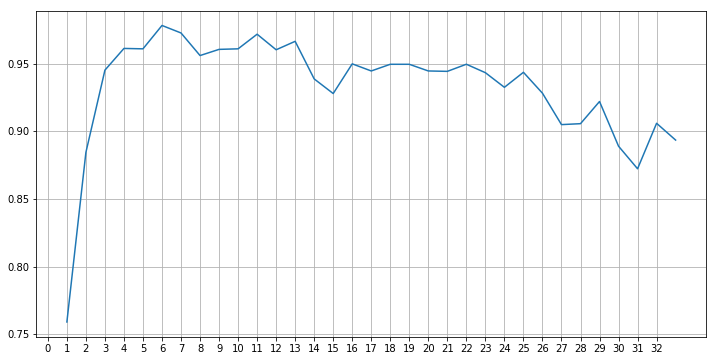

In [22]:
original = np.zeros(33)
for i in range(33):
    X_reduced = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2_new, y_wine)
    cv = StratifiedKFold(n_splits=10, random_state=1) 
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=y_wine, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)
    
from matplotlib.pyplot import figure
fig = figure(figsize=(12, 6))
plt.grid(True)
plt.xticks(np.arange(0, 33, step=1))
plt.plot(range(1,34),original)
plt.show()

In [23]:
X_reduced = SelectKBest(mutual_info_classif, 6).fit_transform(X2_new, y_wine)
cv = StratifiedKFold(n_splits=10, random_state=1) 
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=y_wine, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


0.9783625730994153